# **Offline ensemble co-reactivation links memories across days**. 

This tutorial shows how to access the data related to [DANDI:000718](https://dandiarchive.org/dandiset/000718/draft) using `pynwb`. 

This dataset contains sessions with the 1-photon calcium imaging, calcium imaging segmentation, freezing behavior and behavioral video and other sessions with calcium imaging, calcium imaging segmentation, sleep behavior, EEG, EMG signals along with subject and session metadata.

Contents:

- [Streaming an NWB file](#stream-nwb)
- [Access Subject and Session metadata](#access-subject)
- [Access Raw Imaging](#access-raw-imaging)
- [Access Processed Imaging](#access-raw-imaging)
- [Access Freezing Behavior](#access-freezing)
- [Access EEG or Emg Traces](#access-eeg)
- [Access Sleep Classification](#access-sleep)
- [Access Week-long recordings and cross sessions cell registration](#access-week)

A schematic representation of the dataset:

![Alt text](./assets/cai-conversion-ouput-dataset-structure.png)

A schematic representation NWB file structure for the conditioning sessions ("NeutralExposure", "FC", "Recall1", "Recall2", "Recall3"):

![Alt text](./assets/cai-conversion-ouput-conditioning-session-nwb.png)

A schematic representation NWB file structure for the offline sessions:

![Alt text](./assets/cai-conversion-ouput-offline-session-nwb.png)

A schematic representation NWB file structure for the week-long session:

![Alt text](./assets/cai-conversion-ouput-week-session-nwb.png)


# Select the subject and session you want to load

In [1]:
dandiset_id = "000718"
subject_id = "Ca-EEG3-4"
session_id = "FC"

# Streaming an NWB file from DANDI <a id="stream-nwb"></a>

This section demonstrates how to access the files on the [DANDI Archive](https://dandiarchive.org) without downloading them. Based on the [Streaming NWB files](https://pynwb.readthedocs.io/en/stable/tutorials/advanced_io/streaming.html) tutorial from [PyNWB](https://pynwb.readthedocs.io/en/stable/#).

The `dandi.dandiapi.DandiAPIClient` can be used to get the S3 URL of the NWB file stored in the DANDI Archive.
We will use `remfile` for streaming the file. You can read more about `remfile` at [this tutorial section](https://pynwb.readthedocs.io/en/stable/tutorials/advanced_io/streaming.html#method-3-remfile).

In [2]:
from dandi.dandiapi import DandiAPIClient

nwbfile_path = f"sub-{subject_id}/sub-{subject_id}_ses-{session_id}_image+ophys.nwb"

dandiset_id = "000718"
with DandiAPIClient() as client:
    #This line is necessary when the dataset is in embargoed mode and only owners can view the data, once it will be published this line can be removed.
    client.dandi_authenticate() 
    asset = client.get_dandiset(dandiset_id, 'draft').get_asset_by_path(nwbfile_path)
    s3_url = asset.get_content_url(follow_redirects=1, strip_query=False)

import h5py
import remfile
from pynwb import NWBHDF5IO

file = remfile.File(s3_url)
h5_file = h5py.File(file, "r")
io = NWBHDF5IO(file=h5_file, load_namespaces=True)

Importantly, the `session start time` is the reference time for all timestamps in the file. For instance, an event with a timestamp of 0 in the file means the event occurred exactly at the session start time.

The `session_start_time` is extracted from all_sessions.Session datajoint table.

In [3]:
nwbfile = io.read()
nwbfile

root pynwb.file.NWBFile at 0x1957617466064
Fields:
  acquisition: {
    OnePhotonSeries <class 'pynwb.ophys.OnePhotonSeries'>,
    Video Ca_EEG3-4_FC <class 'pynwb.image.ImageSeries'>
  }
  devices: {
    Microscope <class 'abc.Miniscope'>
  }
  experiment_description: Simultaneous calcium imaging with Miniscopes and EEG/EMG experiment during retrospective memory-linking behavioral paradigm, to test whether ensemble co-reactivation is sleep-state specific. Mice were exposed to the neutral context for 10 min to explore. During aversive encoding, after a baseline period of 2 min, mice received three 2 s foot shocks of either amplitude 0.25 mA (low-shock) or 1.5 mA (high-shock), with an intershock interval of 1 min. Then, 30 s after the final shock, the mice were removed and returned to the vivarium. On the next 3 days, the mice were tested in the previously experienced aversive and neutral contexts, as well as a completely novel context that they had not been exposed to previously, for 5 min each. The features of the neutral and novel contexts were counter-balanced and were made up of different olfactory, auditory, lighting and tactile cues. The aversive context was always the same with distinct cues from the neutral and novel contexts. In the low- versus high-shock experiments mice were tested in the aversive context first, followed by testing in the neutral and novel context counter-balanced; half of the mice received neutral recall and then novel-context exposure the next day, and the other half received novel-context exposure and then neutral recall.
  experimenter: ['Zaki, Yosif']
  file_create_date: [datetime.datetime(2024, 12, 10, 14, 41, 1, 239844, tzinfo=tzoffset(None, 3600))]
  identifier: 72b96b21-d9c9-45f0-bc84-53ee8de74c21
  imaging_planes: {
    ImagingPlane <class 'pynwb.ophys.ImagingPlane'>
  }
  institution: Icahn School of Medicine at Mount Sinai
  keywords: <StrDataset for HDF5 dataset "keywords": shape (8,), type "|O">
  lab: Cai
  processing: {
    behavior <class 'pynwb.base.ProcessingModule'>,
    ophys <class 'pynwb.base.ProcessingModule'>
  }
  related_publications: ['https://doi.org/10.1038/s41586-024-08168-4']
  session_description: Fear Conditioning session: after a baseline period of 2 min, mouse received three 2s foot shocks of 0.25, with an intershock interval of 1 min. Then, 30 s after the final shock, the mice were removed and returned to the vivarium. Context: overhead external light, external fan at medium level, box fan on, even grid floor, acetic acid 1pct scent
  session_id: FC
  session_start_time: 2022-09-19 09:18:41.001000-04:00
  source_script: Created using NeuroConv v0.6.6
  source_script_file_name: C:\Users\Utente\CatalystNeuro\neuroconv\src\neuroconv\basedatainterface.py
  stimulus: {
    ShockStimuli <class 'pynwb.epoch.TimeIntervals'>
  }
  subject: subject pynwb.file.Subject at 0x1957617826576
Fields:
  age: P12W/P18W
  age__reference: birth
  description: Adult C57BL/6J wild-type mice from Jackson Laboratories were used. Mice ordered from Jackson arrived group-housed in cages of 4 mice/cage and were singly housed for the experiment. Mice were ordered to arrive at 8-9 weeks of age and underwent behavioral testing about 4-6 weeks after the arrival date. All experimental procedures were approved by the Icahn School of Medicine at Mount Sinai's IACUC.
  genotype: wild-type
  sex: M
  species: Mus musculus
  strain: C57BL/6J
  subject_id: Ca_EEG3-4

  surgery: Mice were anaesthetized with 1 to 2% isoflurane for surgical procedures and placed into a stereotaxic frame (David Kopf Instruments). Eye ointment was applied to prevent desiccation, and the mice were kept on a heated pad to prevent hypothermia. Surgery was performed using aseptic technique. After surgery, carprofen (5mg per kg) was administered every day for the following 3 days, and ampicillin (20mg per kg) was administered every day for the next 7days. For calcium imaging experiments with EEG/EMG implants, mice underwent thre

In [4]:
nwbfile.session_start_time

datetime.datetime(2022, 9, 19, 9, 18, 41, 1000, tzinfo=tzoffset(None, -14400))

In [5]:
nwbfile.experiment_description

'Simultaneous calcium imaging with Miniscopes and EEG/EMG experiment during retrospective memory-linking behavioral paradigm, to test whether ensemble co-reactivation is sleep-state specific. Mice were exposed to the neutral context for 10 min to explore. During aversive encoding, after a baseline period of 2 min, mice received three 2 s foot shocks of either amplitude 0.25 mA (low-shock) or 1.5 mA (high-shock), with an intershock interval of 1 min. Then, 30 s after the final shock, the mice were removed and returned to the vivarium. On the next 3 days, the mice were tested in the previously experienced aversive and neutral contexts, as well as a completely novel context that they had not been exposed to previously, for 5 min each. The features of the neutral and novel contexts were counter-balanced and were made up of different olfactory, auditory, lighting and tactile cues. The aversive context was always the same with distinct cues from the neutral and novel contexts. In the low- ve

In [6]:
nwbfile.session_description

'Fear Conditioning session: after a baseline period of 2 min, mouse received three 2s foot shocks of 0.25, with an intershock interval of 1 min. Then, 30 s after the final shock, the mice were removed and returned to the vivarium. Context: overhead external light, external fan at medium level, box fan on, even grid floor, acetic acid 1pct scent'

# Access subject <a name="access-subject"></a>

This section demonstrates how to access the [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field in an NWB file.

The [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field can be accessed as `nwbfile.subject`.


In [7]:
nwbfile.subject

subject pynwb.file.Subject at 0x1957617826576
Fields:
  age: P12W/P18W
  age__reference: birth
  description: Adult C57BL/6J wild-type mice from Jackson Laboratories were used. Mice ordered from Jackson arrived group-housed in cages of 4 mice/cage and were singly housed for the experiment. Mice were ordered to arrive at 8-9 weeks of age and underwent behavioral testing about 4-6 weeks after the arrival date. All experimental procedures were approved by the Icahn School of Medicine at Mount Sinai's IACUC.
  genotype: wild-type
  sex: M
  species: Mus musculus
  strain: C57BL/6J
  subject_id: Ca_EEG3-4

# Access OnePhoton Imaging

This section demonstraces how to access the raw One Photon imaging data.

`NWB` organizes data into different groups depending on the type of data. Groups can be thought of as folders within the file. Here are some of the groups within an NWBFile and the types of data they are intended to store:

- `acquisition`: raw, acquired data that should never change
- `processing`: processed data, typically the results of preprocessing algorithms and could change

## Raw OnePhoton Imaging <a name="access-imaging"></a>

The raw OnePhoton imaging data is stored in `pynwb.ophys.OnePhotonSeries` objects (for each channel and plane separately) which is added to `nwbfile.acquisition`.

The data in [OnePhotonSeries](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.OnePhotonSeries) is stored as a three dimensional array: the first dimension is time (frame), the second and third dimensions represent x and y (width by height). 

In [8]:
photon_series_name = "OnePhotonSeries"
photon_series = nwbfile.acquisition[photon_series_name]
photon_series

OnePhotonSeries pynwb.ophys.OnePhotonSeries at 0x1957618143632
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (8161, 608, 608), type "|u1">
  description: Imaging data from Miniscope.
  dimension: <HDF5 dataset "dimension": shape (2,), type "<i4">
  imaging_plane: ImagingPlane pynwb.ophys.ImagingPlane at 0x1958213157200
Fields:
  conversion: 1.0
  description: Imaging plane for Miniscope imaging data.
  device: Microscope abc.Miniscope at 0x1957617778064
Fields:
  ROI: <HDF5 dataset "ROI": shape (2,), type "<i4">
  compression: FFV1
  description: The Miniscope is the head-mounted miniature microscope part of the UCLA Miniscope imaging platform.
  deviceType: Miniscope_V4_BNO
  frameRate: 30FPS
  framesPerFile: 1000
  gain: 3.5
  led0: 1

  excitation_lambda: 496.0
  grid_spacing_unit: meters
  imaging_rate: 30.0
  indicator: GCaMP6f
  location: CA1
  optical_channel: (
    GreenChannel <class 'pynwb.ophys.OpticalChannel'>,
    OpticalChannel <class 'pynwb.ophys.OpticalChannel'>
  )
  origin_coords_unit: meters
  unit: meters

  interval: 1
  offset: 0.0
  resolution: -1.0
  timestamps: <HDF5 dataset "timestamps": shape (8161,), type "<f8">
  timestamps_unit: seconds
  unit: n.a.

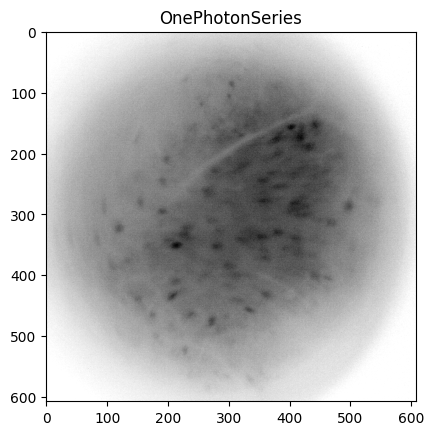

In [9]:
# Visualize the imaging data.
from matplotlib import pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)
ax.imshow(photon_series.data[70], cmap="binary")
ax.set_title(photon_series_name)
plt.show()


In [10]:
photon_series.timestamps[:100]

array([0.   , 0.034, 0.068, 0.1  , 0.133, 0.168, 0.201, 0.234, 0.268,
       0.302, 0.335, 0.369, 0.403, 0.435, 0.469, 0.504, 0.537, 0.571,
       0.605, 0.638, 0.671, 0.705, 0.738, 0.771, 0.806, 0.839, 0.873,
       0.907, 0.94 , 0.974, 1.007, 1.041, 1.074, 1.107, 1.142, 1.175,
       1.208, 1.243, 1.275, 1.308, 1.343, 1.376, 1.41 , 1.444, 1.476,
       1.511, 1.545, 1.578, 1.612, 1.645, 1.678, 1.712, 1.745, 1.778,
       1.813, 1.846, 1.879, 1.915, 1.947, 1.98 , 2.014, 2.048, 2.08 ,
       2.115, 2.148, 2.182, 2.215, 2.25 , 2.283, 2.316, 2.351, 2.384,
       2.417, 2.451, 2.484, 2.517, 2.552, 2.585, 2.618, 2.653, 2.685,
       2.718, 2.753, 2.786, 2.819, 2.853, 2.887, 2.921, 2.954, 2.988,
       3.021, 3.055, 3.089, 3.122, 3.155, 3.19 , 3.223, 3.257, 3.29 ,
       3.323])

In [11]:
photon_series.dimension[:]

array([608, 608], dtype=int32)

Imaging metadata include information on the **device** used to acquire the image and the **optical channel** specs contained in the imaging plane object

In [12]:
nwbfile.imaging_planes["ImagingPlane"]

ImagingPlane pynwb.ophys.ImagingPlane at 0x1958213157200
Fields:
  conversion: 1.0
  description: Imaging plane for Miniscope imaging data.
  device: Microscope abc.Miniscope at 0x1957617778064
Fields:
  ROI: <HDF5 dataset "ROI": shape (2,), type "<i4">
  compression: FFV1
  description: The Miniscope is the head-mounted miniature microscope part of the UCLA Miniscope imaging platform.
  deviceType: Miniscope_V4_BNO
  frameRate: 30FPS
  framesPerFile: 1000
  gain: 3.5
  led0: 1

  excitation_lambda: 496.0
  grid_spacing_unit: meters
  imaging_rate: 30.0
  indicator: GCaMP6f
  location: CA1
  optical_channel: (
    GreenChannel <class 'pynwb.ophys.OpticalChannel'>,
    OpticalChannel <class 'pynwb.ophys.OpticalChannel'>
  )
  origin_coords_unit: meters
  unit: meters

In [13]:
nwbfile.devices["Microscope"]

Microscope abc.Miniscope at 0x1957617778064
Fields:
  ROI: <HDF5 dataset "ROI": shape (2,), type "<i4">
  compression: FFV1
  description: The Miniscope is the head-mounted miniature microscope part of the UCLA Miniscope imaging platform.
  deviceType: Miniscope_V4_BNO
  frameRate: 30FPS
  framesPerFile: 1000
  gain: 3.5
  led0: 1

## Accessing the segmentation data

The segmentation output for the One Photon Imaging data is stored in `nwbfile.processing["ophys"]`. 

In NWB, the [PlaneSegmentation](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.PlaneSegmentation) class stores the detected regions of interest in the [OnePhotonSeries](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.OnePhotonSeries) data. The [ImageSegmentation](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.ImageSegmentation) can contain multiple `PlaneSegmentation` tables, so that we can store results of different segmentation algorithms or different segmentation classes.

We can access the plane segmentation for the [OnePhotonSeries](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.OnePhotonSeries) data as 
`nwbfile.processing["ophys"]["ImageSegmentation"]["PlaneSegmentationChannel_number_Plane_number_"]`.

In [14]:
nwbfile.processing["ophys"]

ophys pynwb.base.ProcessingModule at 0x1957598159248
Fields:
  data_interfaces: {
    Fluorescence <class 'pynwb.ophys.Fluorescence'>,
    ImageSegmentation <class 'pynwb.ophys.ImageSegmentation'>,
    SegmentationImages <class 'pynwb.base.Images'>
  }
  description: No description.

### The SegmentationImages data interface
 SegmentationImages data interface contains summary images such as the Maximum Projection Image

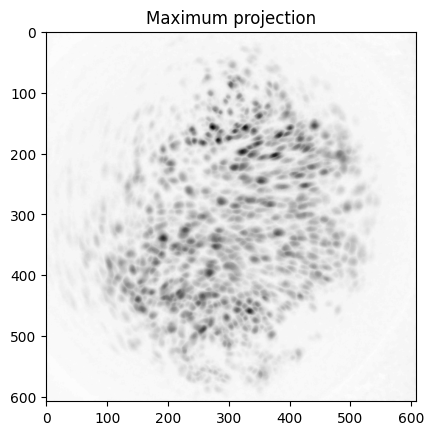

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)
max_projection_image = nwbfile.processing["ophys"]["SegmentationImages"].images["maximum_projection"]
ax.imshow(max_projection_image.data[:], cmap="binary")
ax.set_title("Maximum projection")
plt.show()

### The ImageSegmentation data interface
 ImageSegmentation data interface contains the spatial data of the segmentation output.
 The PlaneSegmentation stores masks of an image that represent different regions of interest (ROIs). All segmentation for a given imaging plane is stored together, with storage for multiple imaging planes (masks) supported. Each ROI is stored in its own subgroup, with the ROI group containing both a 2D mask and a list of pixels that make up this mask. 

In [16]:
plane_segmentation_names = list(nwbfile.processing["ophys"]["ImageSegmentation"].plane_segmentations.keys())
_ = [print(name) for name in nwbfile.processing["ophys"]["ImageSegmentation"].plane_segmentations.keys()]

BackgroundPlaneSegmentation
PlaneSegmentation


In [17]:
plane_seg_name = "PlaneSegmentation"
plane_segmentation = nwbfile.processing["ophys"]["ImageSegmentation"].plane_segmentations[plane_seg_name]
plane_segmentation.to_dataframe()

image_mask ROICentroids
id                                                                 
0    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...    [341, 39]
1    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...    [444, 43]
2    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...    [356, 62]
3    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...    [405, 62]
4    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...    [380, 64]
..                                                 ...          ...
778  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   [315, 530]
779  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   [327, 529]
780  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   [277, 530]
781  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   [372, 533]
782  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   [281, 542]

[783 rows x 2 columns]

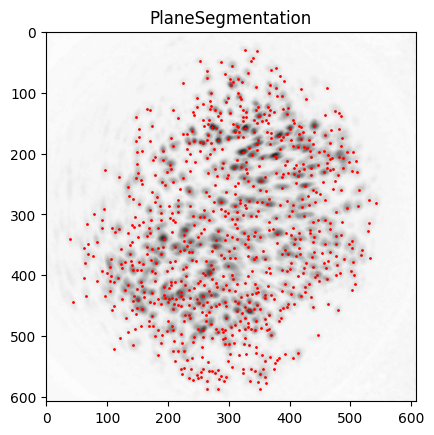

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)   
ax.imshow(max_projection_image.data[:], cmap="binary")
for roi_centroid in plane_segmentation["ROICentroids"]:
    ax.scatter(roi_centroid[1], roi_centroid[0],c="red", s=1)
ax.set_title(plane_seg_name)
plt.show()

## The Fluorescence data interface
The Fluorescence data interface stores the fluorescence information about a region of interest (ROI): the ROI response series. 
Each ROI response series stores ROI responses over an imaging plane. Each column in data should correspond to the signal from one ROI.

In [19]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

roi_response_series_names = [name for name in nwbfile.processing["ophys"]["Fluorescence"].roi_response_series.keys()]
roi_response_series_names

['Baseline', 'Deconvolved', 'Denoised', 'neuropil']

In [20]:
roi_response_series = nwbfile.processing["ophys"]["Fluorescence"]["Denoised"]
roi_response_series

Denoised pynwb.ophys.RoiResponseSeries at 0x1957617764880
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (4076, 783), type "<f8">
  description: description of denoised traces
  interval: 1
  offset: 0.0
  resolution: -1.0
  rois: rois <class 'hdmf.common.table.DynamicTableRegion'>
  timestamps: <HDF5 dataset "timestamps": shape (4076,), type "<f8">
  timestamps_unit: seconds
  unit: n.a.

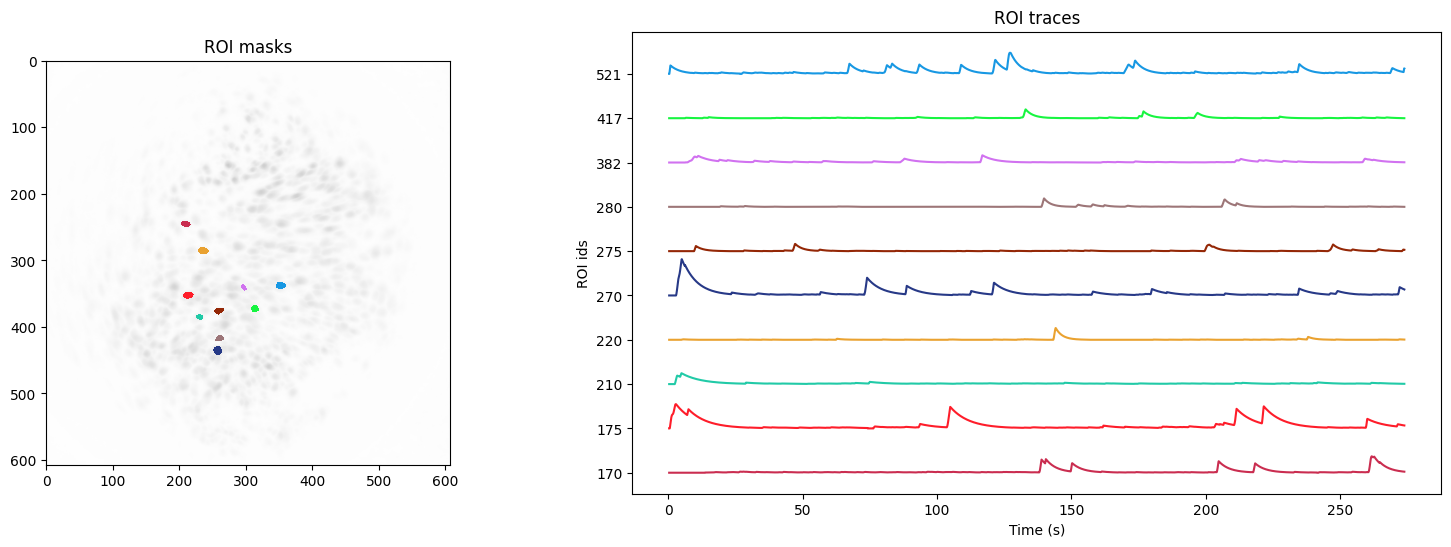

In [21]:
import random
from matplotlib.colors import ListedColormap
import numpy as np
roi_ids = [170, 175, 210, 220, 270, 275, 280, 382, 417, 521]
fig = plt.figure(figsize=(18, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 2], wspace=0.3)  
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 0])

ax2.imshow(max_projection_image.data[:], cmap="binary", alpha=0.2)

timestamps = roi_response_series.timestamps[:]
for n, roi_id in enumerate(roi_ids):
    random_color = [random.random() for _ in range(3)] + [1]
    custom_cmap = ListedColormap([[0, 0, 0, 0], random_color])
    
    ax1.plot(timestamps, roi_response_series.data[:,roi_id] + n*np.max(roi_response_series.data[:,:]), color=random_color)

    image_mask = plane_segmentation.image_mask[roi_id]

    ax2.imshow(image_mask, cmap=custom_cmap)

ax1.set_yticks([n*np.max(roi_response_series.data[:,:]) for n in range(len(roi_ids))])
ax1.set_yticklabels(roi_ids)
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("ROI ids")
ax1.set_title("ROI traces")

ax2.set_title("ROI masks")

plt.show()

# Access Freezing Behavior <a name="access-freezing"></a>
#### **Only for conditioning session** "NeutralExposure", "FC", "Recall1", "Recall2", "Recall3"
This section demonstrates how to access the freeze analysis output and metadata.


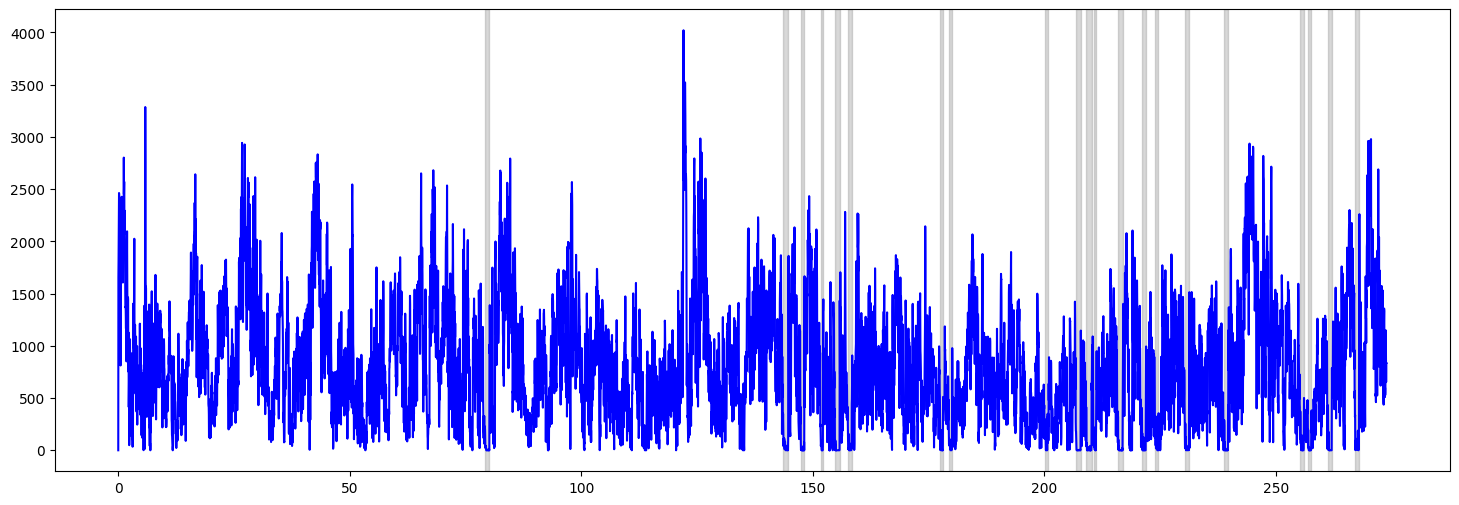

In [22]:
import numpy as np
motion_series = nwbfile.processing["behavior"]["MotionSeries"].data[:]
rate = nwbfile.processing["behavior"]["MotionSeries"].rate
starting_time = nwbfile.processing["behavior"]["MotionSeries"].starting_time
time = np.linspace(starting_time, motion_series.shape[0] / rate, motion_series.shape[0])
start_times = nwbfile.processing["behavior"]["FreezingIntervals"].start_time[:]
stop_times = nwbfile.processing["behavior"]["FreezingIntervals"].stop_time[:]
import matplotlib.pyplot as plt

# Plotting
fig, ax = plt.subplots(figsize=(18, 6))
# Overlay grey boxes for each interval
for start, stop in zip(start_times, stop_times):
    if start > motion_series.shape[0] / rate:
        break
    ax.axvspan(start, stop, color="grey", alpha=0.3)
# Plot the time series
ax.plot(time, motion_series, color="blue", label="Motion Series")
plt.show()

# Access Shock Stimulus table <a name="access-shock"></a>
#### **Only for fear conditioning session** "FC", "Recall1"
This section demonstrates how to access the shock stimulus table.

In [23]:
shock_stimulus = nwbfile.stimulus["ShockStimuli"]
shock_stimulus.description

'During aversive encoding, after a baseline period of 2 min, mice received three 2 s foot shocks of either amplitude 0.25 mA (low-shock) or 1.5 mA (high-shock), with an intershock interval of 1 min. All testing was done in Med Associates chambers. '

In [24]:
shock_stimulus.to_dataframe()

start_time  stop_time  shock_amplitude
id                                        
0        120.0      122.0             0.25
1        180.0      182.0             0.25
2        240.0      242.0             0.25

# Access EEG or EMG Signals <a name="access-eeg"></a>
#### **Only for offline session** "OfflineDay1Session1", "OfflineDay1Session2", ..., "OfflineDay2Session1", ...

In [25]:
subject_id = "Ca-EEG3-4"
session_id = "OfflineDay1Session1"

In [26]:
from dandi.dandiapi import DandiAPIClient

nwbfile_path = f"sub-{subject_id}/sub-{subject_id}_ses-{session_id}_ophys.nwb"

dandiset_id = "000718"
with DandiAPIClient() as client:
    #This line is necessary when the dataset is in embargoed mode and only owners can view the data, once it will be published this line can be removed.
    client.dandi_authenticate() 
    asset = client.get_dandiset(dandiset_id, 'draft').get_asset_by_path(nwbfile_path)
    s3_url = asset.get_content_url(follow_redirects=1, strip_query=False)

import h5py
import remfile
from pynwb import NWBHDF5IO

file = remfile.File(s3_url)
h5_file = h5py.File(file, "r")
io = NWBHDF5IO(file=h5_file, load_namespaces=True)
nwbfile = io.read()
nwbfile.session_description

'After Neutral Exposure and Fear Conditioning sessions, mice were taken out of the testing chambers and immediately placed in their homecage (scope was not removed).The homecage was placed in a dark grey storage bin with a webcam on top of the bin, taped to a wooden plank, looking down into the homecage. Mouse behavior and calcium were recorded for an hour.'

This section demonstrates how to access the data recorded with the HD-X02 wireless telemetry probe.

### EEG Signal

In [27]:
eeg_signal = nwbfile.acquisition["EEGSignal"]
eeg_signal

EEGSignal pynwb.base.TimeSeries at 0x1957635812880
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (300064,), type "<f4">
  description: EEG signal recorder with HD-X02 wireless telemetry probe
  offset: 0.0
  rate: 500.0
  resolution: -1.0
  starting_time: 0.0
  starting_time_unit: seconds
  unit: volts

In this case since the signal has regular timestamps, the starting time and rate are saved instead of timestamps. To retreive the timestamps, we simply use the get_timestamps() function

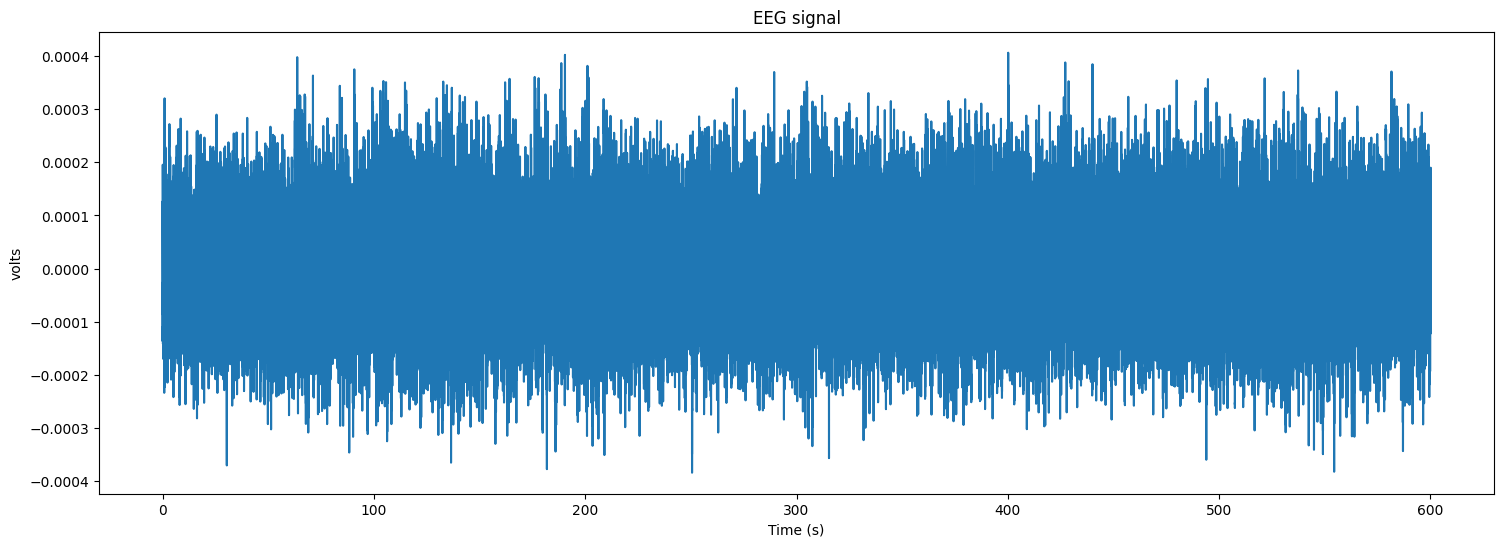

In [28]:
timestamps = eeg_signal.get_timestamps()
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(timestamps, eeg_signal.data[:])
ax.set_title("EEG signal")
ax.set_xlabel("Time (s)")
ax.set_ylabel(eeg_signal.unit)
plt.show()

### EMG Signal

In [29]:
emg_signal = nwbfile.acquisition["EMGSignal"]
emg_signal

EMGSignal pynwb.base.TimeSeries at 0x1957627113040
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (300064,), type "<f4">
  description: EMG signal recorder with HD-X02 wireless telemetry probe
  offset: 0.0
  rate: 500.0
  resolution: -1.0
  starting_time: 0.0
  starting_time_unit: seconds
  unit: volts

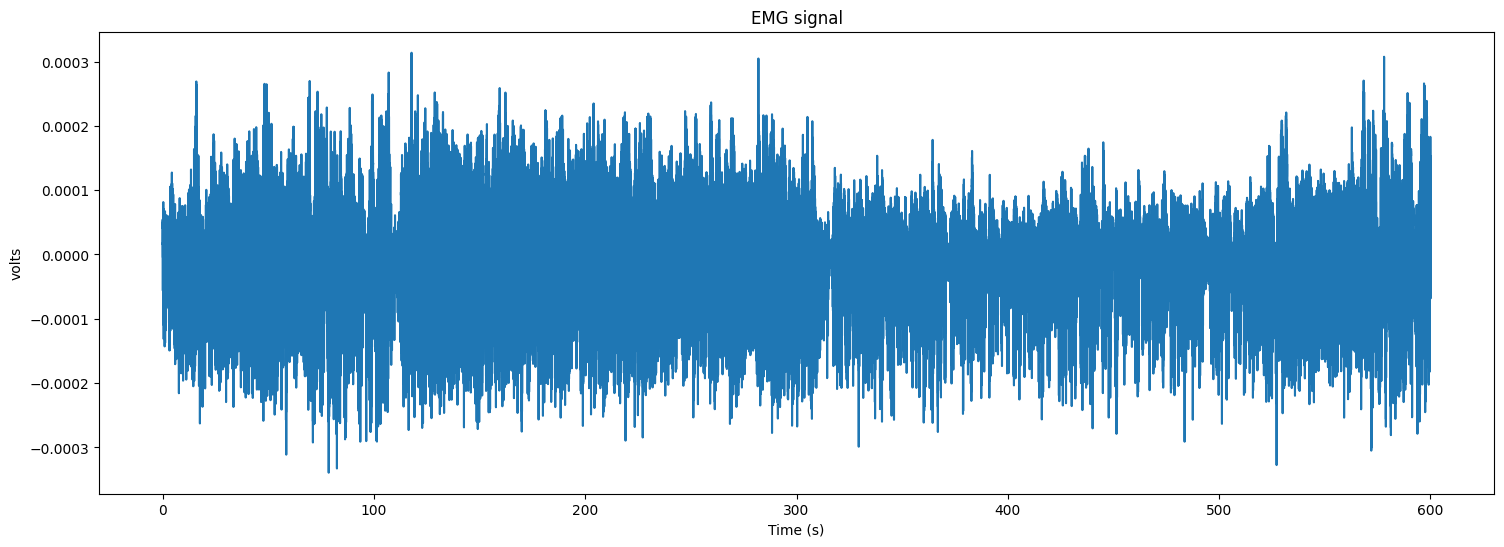

In [30]:
timestamps = emg_signal.get_timestamps()
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(timestamps, emg_signal.data[:])
ax.set_title("EMG signal")
ax.set_xlabel("Time (s)")
ax.set_ylabel(emg_signal.unit)
plt.show()

### Temperature Signal

In [31]:
temperature_signal = nwbfile.acquisition["TemperatureSignal"]
temperature_signal

TemperatureSignal pynwb.base.TimeSeries at 0x1957639237520
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (300064,), type "<f4">
  description: Temperature signal recorder with HD-X02 wireless telemetry probe
  offset: 0.0
  rate: 500.0
  resolution: -1.0
  starting_time: 0.0
  starting_time_unit: seconds
  unit: celsius

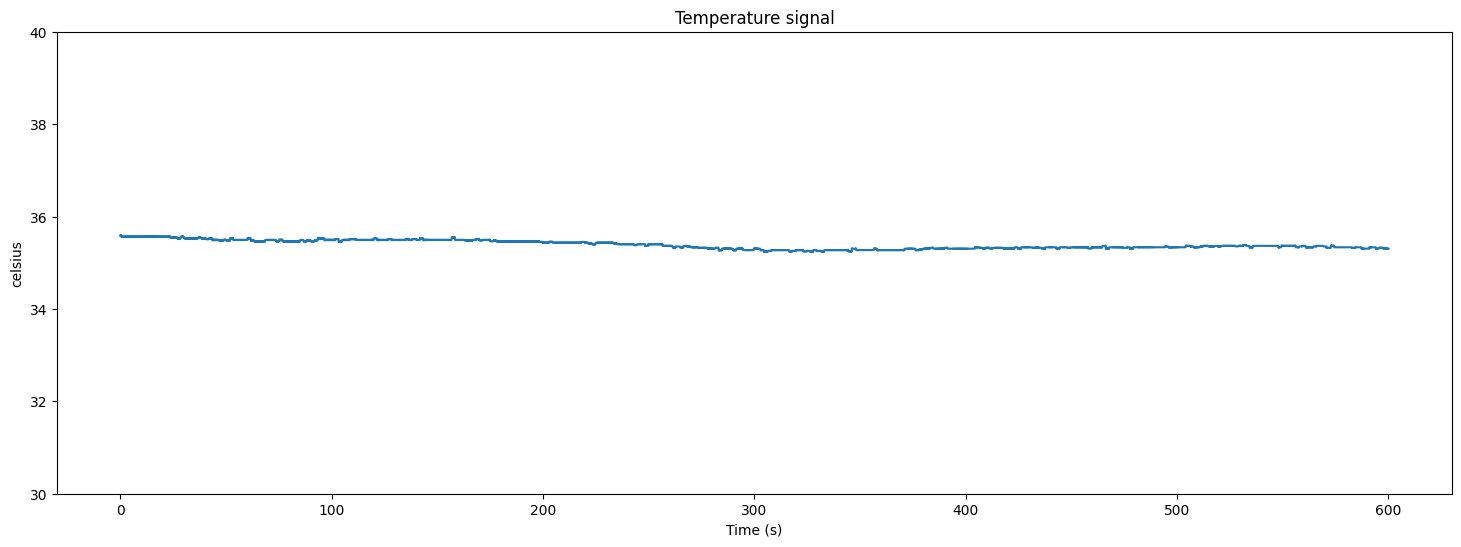

In [32]:
timestamps = temperature_signal.get_timestamps()
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(timestamps, temperature_signal.data[:])
ax.set_title("Temperature signal")
ax.set_xlabel("Time (s)")
ax.set_ylabel(temperature_signal.unit)
ax.set_ylim(30, 40)
plt.show()

### Activity Signal

In [33]:
activity_signal = nwbfile.acquisition["ActivitySignal"]
activity_signal

ActivitySignal pynwb.base.TimeSeries at 0x1957766652496
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (300064,), type "<f4">
  description: Activity signal recorder with HD-X02 wireless telemetry probe. It refers to the motion of the probe relative to the receiver and it can be used as a proxy for locomotion.
  offset: 0.0
  rate: 500.0
  resolution: -1.0
  starting_time: 0.0
  starting_time_unit: seconds
  unit: n.a.

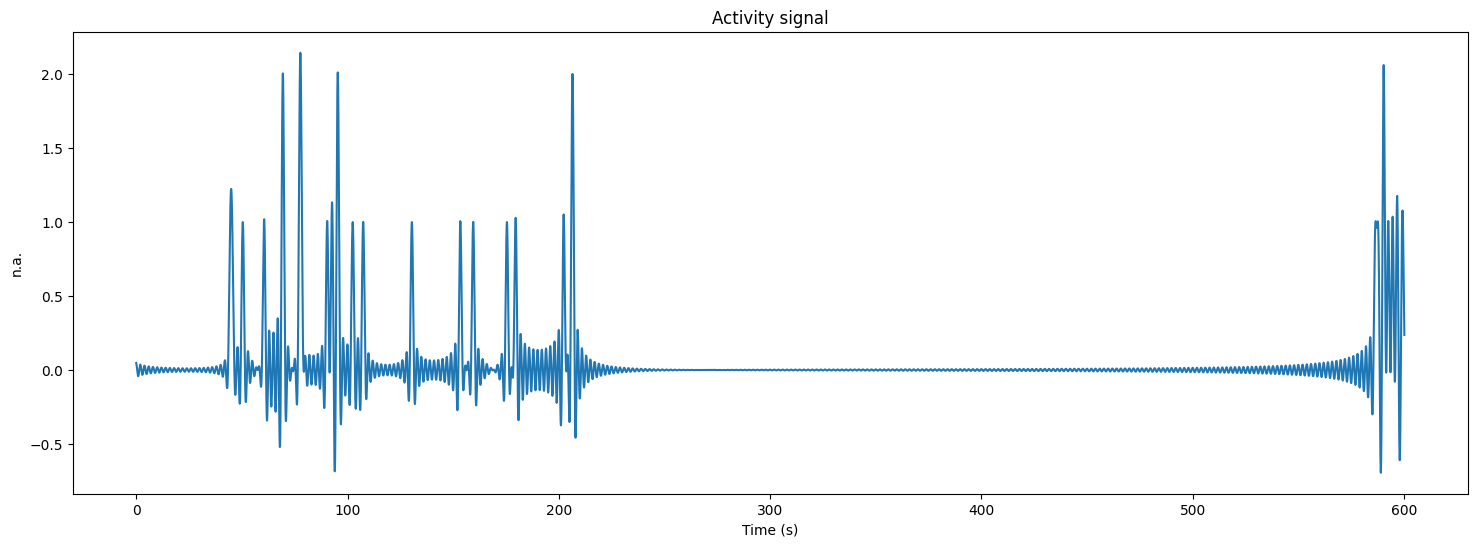

In [34]:
timestamps = activity_signal.get_timestamps()
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(timestamps, activity_signal.data[:])
ax.set_title("Activity signal")
ax.set_xlabel("Time (s)")
ax.set_ylabel(activity_signal.unit)
plt.show()

# Access Sleep Classification <a name="access-sleep"></a>

This section demonstrates how to access the sleep classification data.

In [35]:
sleep_intervals = nwbfile.processing["sleep"]["SleepIntervals"].to_dataframe()
sleep_intervals


start_time   stop_time sleep_state
id                                    
0     0.000000   42.800000  quiet wake
1    42.866667   60.800000        wake
2    60.866667   66.733333  quiet wake
3    66.800000   78.800000        wake
4    78.866667   84.733333  quiet wake
5    84.800000  108.733333        wake
6   108.800000  126.800000  quiet wake
7   126.866667  132.733333        wake
8   132.800000  150.733333  quiet wake
9   150.800000  180.733333        wake
10  180.800000  198.733333  quiet wake
11  198.800000  210.800000        wake
12  210.866667  582.800000  quiet wake
13  582.866667  599.266667        wake

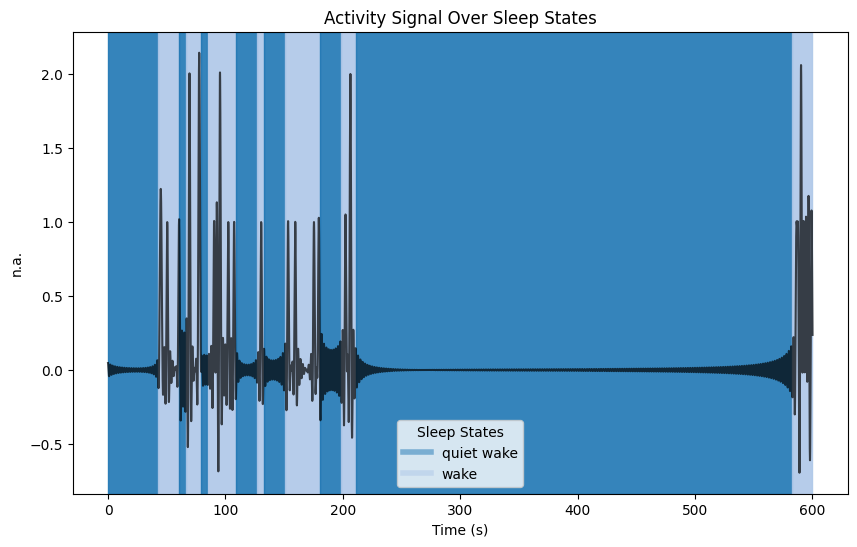

In [36]:
import matplotlib.pyplot as plt

unique_states = sleep_intervals["sleep_state"].unique()
colors = plt.cm.tab20.colors  # Use a color map with enough colors
color_mapping = {state: colors[i % len(colors)] for i, state in enumerate(unique_states)}

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Overlay boxes for each interval with dynamically assigned colors
for start, stop, state in zip(sleep_intervals["start_time"], sleep_intervals["stop_time"], sleep_intervals["sleep_state"]):
    ax.axvspan(start, stop, color=color_mapping[state], alpha=0.9, label=state)
    
ax.plot(activity_signal.get_timestamps(), activity_signal.data[:], color = "black", alpha=0.7)

ax.set_title("Activity Signal Over Sleep States")
ax.set_xlabel("Time (s)")
ax.set_ylabel(activity_signal.unit)

# Create a legend with unique sleep states
handles = [plt.Line2D([0], [0], color=color_mapping[state], lw=4, alpha=0.5) for state in unique_states]
ax.legend(handles, unique_states, title="Sleep States")

# Access Week-long recordings and cross sessions cell registration  <a name="access-week"></a>


In [37]:
subject_id = "Ca-EEG2-1"
session_id = "Week"

In [38]:
from dandi.dandiapi import DandiAPIClient

nwbfile_path = f"sub-{subject_id}/sub-{subject_id}_ses-{session_id}.nwb"

dandiset_id = "000718"
with DandiAPIClient() as client:
    #This line is necessary when the dataset is in embargoed mode and only owners can view the data, once it will be published this line can be removed.
    client.dandi_authenticate() 
    asset = client.get_dandiset(dandiset_id, 'draft').get_asset_by_path(nwbfile_path)
    s3_url = asset.get_content_url(follow_redirects=1, strip_query=False)

import h5py
import remfile
from pynwb import NWBHDF5IO

file = remfile.File(s3_url)
h5_file = h5py.File(file, "r")
io = NWBHDF5IO(file=h5_file, load_namespaces=True)
nwbfile = io.read()
nwbfile

root pynwb.file.NWBFile at 0x1957779186448
Fields:
  acquisition: {
    ActivitySignal <class 'pynwb.base.TimeSeries'>,
    EEGSignal <class 'pynwb.base.TimeSeries'>,
    EMGSignal <class 'pynwb.base.TimeSeries'>,
    TemperatureSignal <class 'pynwb.base.TimeSeries'>
  }
  devices: {
    HD-X02, Data Science International <class 'pynwb.device.Device'>
  }
  epochs: epochs <class 'pynwb.epoch.TimeIntervals'>
  experiment_description: Simultaneous calcium imaging with Miniscopes and EEG/EMG experiment during retrospective memory-linking behavioral paradigm, to test whether ensemble co-reactivation is sleep-state specific. Mice were exposed to the neutral context for 10 min to explore. During aversive encoding, after a baseline period of 2 min, mice received three 2 s foot shocks of either amplitude 0.25 mA (low-shock) or 1.5 mA (high-shock), with an intershock interval of 1 min. Then, 30 s after the final shock, the mice were removed and returned to the vivarium. On the next 3 days, the mice were tested in the previously experienced aversive and neutral contexts, as well as a completely novel context that they had not been exposed to previously, for 5 min each. The features of the neutral and novel contexts were counter-balanced and were made up of different olfactory, auditory, lighting and tactile cues. The aversive context was always the same with distinct cues from the neutral and novel contexts. In the low- versus high-shock experiments mice were tested in the aversive context first, followed by testing in the neutral and novel context counter-balanced; half of the mice received neutral recall and then novel-context exposure the next day, and the other half received novel-context exposure and then neutral recall.
  experimenter: ['Zaki, Yosif']
  file_create_date: [datetime.datetime(2024, 12, 10, 14, 5, 46, 100834, tzinfo=tzoffset(None, 3600))]
  identifier: 26ca7e3f-a838-4603-b0c7-f777cfb83943
  institution: Icahn School of Medicine at Mount Sinai
  intervals: {
    epochs <class 'pynwb.epoch.TimeIntervals'>
  }
  keywords: <StrDataset for HDF5 dataset "keywords": shape (8,), type "|O">
  lab: Cai
  processing: {
    cell_registration <class 'pynwb.base.ProcessingModule'>
  }
  related_publications: ['https://doi.org/10.1038/s41586-024-08168-4']
  session_id: Week
  session_start_time: 2021-10-08 07:00:00+00:00
  source_script: Created using NeuroConv v0.6.6
  source_script_file_name: C:\Users\Utente\CatalystNeuro\neuroconv\src\neuroconv\basedatainterface.py
  subject: subject pynwb.file.Subject at 0x1957778205008
Fields:
  age: P12W/P18W
  age__reference: birth
  description: Adult C57BL/6J wild-type mice from Jackson Laboratories were used. Mice ordered from Jackson arrived group-housed in cages of 4 mice/cage and were singly housed for the experiment. Mice were ordered to arrive at 8-9 weeks of age and underwent behavioral testing about 4-6 weeks after the arrival date. All experimental procedures were approved by the Icahn School of Medicine at Mount Sinai's IACUC.
  genotype: wild-type
  sex: M
  species: Mus musculus
  strain: C57BL/6J
  subject_id: Ca_EEG2-1

  surgery: Mice were anaesthetized with 1 to 2% isoflurane for surgical procedures and placed into a stereotaxic frame (David Kopf Instruments). Eye ointment was applied to prevent desiccation, and the mice were kept on a heated pad to prevent hypothermia. Surgery was performed using aseptic technique. After surgery, carprofen (5mg per kg) was administered every day for the following 3 days, and ampicillin (20mg per kg) was administered every day for the next 7days. For calcium imaging experiments with EEG/EMG implants, mice underwent three serial procedures spaced around 2 weeks apart. During the first surgery, mice had 300 nl of AAV1-Syn-GCaMP6f injected into dorsal CA1 (AP, âˆ’2 mm; ML, +1.5 mm; DV, âˆ’1.2 mm), the incision was sutured after the surgery. Then, 2 weeks later during a second surgery, mice had their overlying cortex aspirated and a GRIN lens wa

In [39]:
nwbfile.session_description

''

In [40]:
from datetime import timedelta
week_session_start = nwbfile.session_start_time
timestamps = nwbfile.acquisition["EEGSignal"].get_timestamps()
week_session_end = week_session_start + timedelta(seconds=timestamps[-1])
week_session_start = week_session_start.strftime("%Y-%m-%d %H:%M:%S %Z")
week_session_end = week_session_end.strftime("%Y-%m-%d %H:%M:%S %Z")
print(f"Session started:\t{week_session_start} \nSession ended:\t\t{week_session_end}")

Session started:	2021-10-08 07:00:00 UTC 
Session ended:		2021-10-17 15:39:49 UTC


## EEG recording

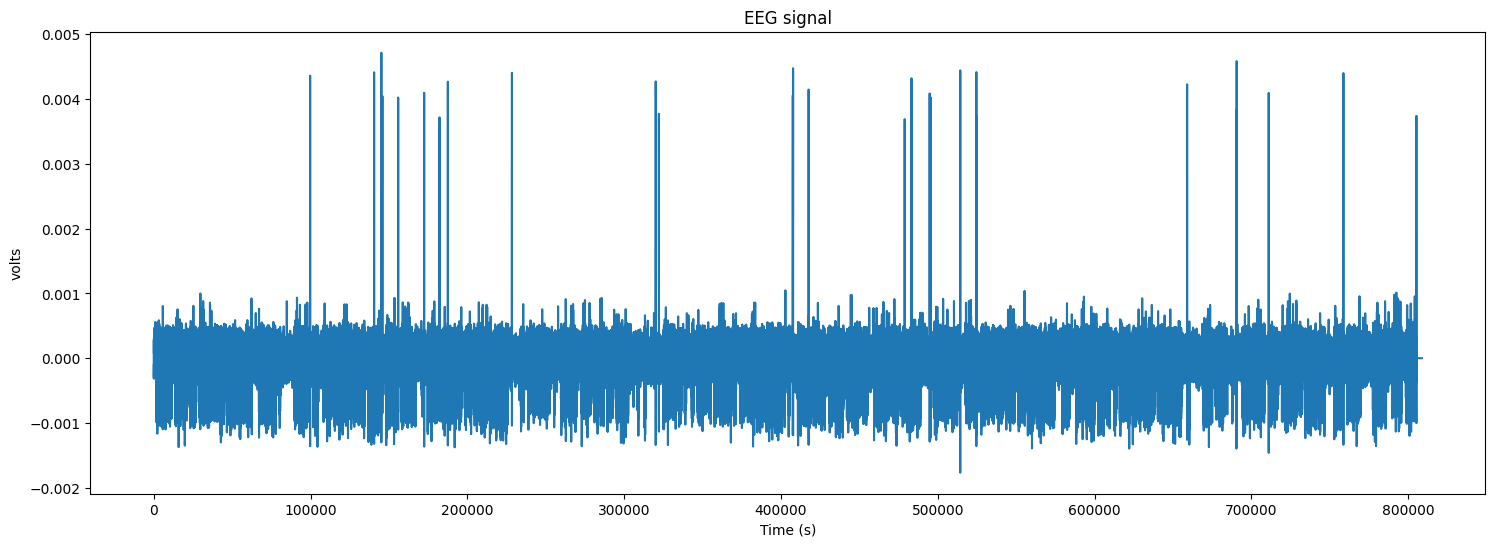

In [41]:
eeg_signal = nwbfile.acquisition["EEGSignal"]
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(timestamps, eeg_signal.data[:])
ax.set_title("EEG signal")
ax.set_xlabel("Time (s)")
ax.set_ylabel(eeg_signal.unit)
plt.show()

## Experimental Sessions during the week

In [42]:
nwbfile.epochs.to_dataframe()

start_time   stop_time           session_ids
id                                              
0   359058.744  359658.717       NeutralExposure
1   617599.999  617899.952               Recall1
2   529884.777  530158.743                    FC
3   527067.677  527667.538   OfflineDay2Session1
4   528867.463  529467.359   OfflineDay2Session2
5   530667.282  531267.178   OfflineDay2Session3
6   532467.102  533066.997   OfflineDay2Session4
7   534266.922  534866.817   OfflineDay2Session5
8   536066.738  536666.632   OfflineDay2Session6
9   537866.553  538466.447   OfflineDay2Session7
10  539666.372  540266.265   OfflineDay2Session8
11  541466.187  542066.080   OfflineDay2Session9
12  543266.005  543865.900  OfflineDay2Session10
13  545065.825  545665.720  OfflineDay2Session11
14  546865.644  547465.538  OfflineDay2Session12
15  548665.430  549265.358  OfflineDay2Session13
16  550465.248  551065.177  OfflineDay2Session14
17  552265.067  552864.995  OfflineDay2Session15
18  554064.885  554664.780  OfflineDay2Session16
19  555864.703  556464.597  OfflineDay2Session17
20  557664.522  558264.416  OfflineDay2Session18
21  559464.340  560064.236  OfflineDay2Session19
22  356757.595  356813.764   OfflineDay1Session1
23  356897.828  357005.289   OfflineDay1Session2
24  357044.154  357312.538   OfflineDay1Session3
25  357350.761  357417.826   OfflineDay1Session4
26  364070.226  364370.844   OfflineDay1Session5

## Cell Registration across sessions

In [43]:
nwbfile.processing["cell_registration"]

cell_registration pynwb.base.ProcessingModule at 0x1957777873872
Fields:
  data_interfaces: {
    OfflineDay2Session10vsConditioningSessions <class 'hdmf.common.table.DynamicTable'>,
    OfflineDay2Session11vsConditioningSessions <class 'hdmf.common.table.DynamicTable'>,
    OfflineDay2Session12vsConditioningSessions <class 'hdmf.common.table.DynamicTable'>,
    OfflineDay2Session13vsConditioningSessions <class 'hdmf.common.table.DynamicTable'>,
    OfflineDay2Session14vsConditioningSessions <class 'hdmf.common.table.DynamicTable'>,
    OfflineDay2Session15vsConditioningSessions <class 'hdmf.common.table.DynamicTable'>,
    OfflineDay2Session16vsConditioningSessions <class 'hdmf.common.table.DynamicTable'>,
    OfflineDay2Session17vsConditioningSessions <class 'hdmf.common.table.DynamicTable'>,
    OfflineDay2Session18vsConditioningSessions <class 'hdmf.common.table.DynamicTable'>,
    OfflineDay2Session19vsConditioningSessions <class 'hdmf.common.table.DynamicTable'>,
    OfflineDay2Session1vsConditioningSessions <class 'hdmf.common.table.DynamicTable'>,
    OfflineDay2Session2vsConditioningSessions <class 'hdmf.common.table.DynamicTable'>,
    OfflineDay2Session3vsConditioningSessions <class 'hdmf.common.table.DynamicTable'>,
    OfflineDay2Session4vsConditioningSessions <class 'hdmf.common.table.DynamicTable'>,
    OfflineDay2Session5vsConditioningSessions <class 'hdmf.common.table.DynamicTable'>,
    OfflineDay2Session6vsConditioningSessions <class 'hdmf.common.table.DynamicTable'>,
    OfflineDay2Session7vsConditioningSessions <class 'hdmf.common.table.DynamicTable'>,
    OfflineDay2Session8vsConditioningSessions <class 'hdmf.common.table.DynamicTable'>,
    OfflineDay2Session9vsConditioningSessions <class 'hdmf.common.table.DynamicTable'>
  }
  description: Processing module for cross session cell registration. Cells recorded across sessions were cross-registered using a previously published open-source cross-registration algorithm, CellReg, using the spatial correlations of nearby cells to determine whether highly correlated footprints close in space are likely to be the same cell across sessions.Each offline recording was cross-registered with all the encoding and recall sessions, but not with the other offline sessions because cross-registering between all sessions would lead to too many conflicts and, therefore, to no cells cross-registered across all sessions.Each table represents the output of the cross-registration between one offline sessions and all the encoding and recall sessions. A table maps the global ROI ids (row of the table) to the ROI ids in each of cross-registered session's plane segmentation.

In [45]:
nwbfile.processing["cell_registration"]["OfflineDay2Session10vsConditioningSessions"].to_dataframe()

Ca_EEG2-1_FC  Ca_EEG2-1_NeutralExposure  Ca_EEG2-1_OfflineDay2Session10  \
id                                                                              
0                0                          2                               3   
1                1                          4                               4   
2            -9999                      -9999                               5   
3                3                      -9999                           -9999   
4            -9999                      -9999                               7   
...            ...                        ...                             ...   
1321         -9999                      -9999                           -9999   
1322         -9999                      -9999                           -9999   
1323         -9999                      -9999                           -9999   
1324         -9999                      -9999                           -9999   
1325         -9999                      -9999                           -9999   

      Ca_EEG2-1_Recall1  
id                       
0                 -9999  
1                 -9999  
2                 -9999  
3                 -9999  
4                 -9999  
...                 ...  
1321                334  
1322                 20  
1323                 73  
1324                106  
1325                308  

[1326 rows x 4 columns]